In [ ]:
#@title Laplace Model Inversions

# Setup

In [ ]:

#@markdown Basic imports

import sys
print(sys.version)

import numpy as np
import pandas as pd
import scipy as sp
import matplotlib.pyplot as plt
import importlib  # for reloading imports to source functions



3.7.10 (default, May  3 2021, 02:48:31) 
[GCC 7.5.0]


In [40]:
#@markdown Import my code from google drive

from google.colab import drive
drive.mount('/content/drive')
new_path = "/content/drive/MyDrive/Computer Backups/Rahul Yerrabelli drive/Academics/Work/SpectorMechanicsLab/SpectorResearch/Computations/SpectorLog/Yerrabelli-Spector-Porelastic-Model-Code/src"
if new_path not in sys.path:
  sys.path.insert(0,new_path)

#from src.euler_inversion import euler_inversion
#from src import plotting
#from src import viscoporoelastic_model
#from src.viscoporoelastic_model import ViscoporoelasticModel
from euler_inversion import euler_inversion
import plotting
import viscoporoelastic_model
from viscoporoelastic_model import ViscoporoelasticModel

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Simple Laplace Model Inversion

Time taken in sec: 0.010440587997436523


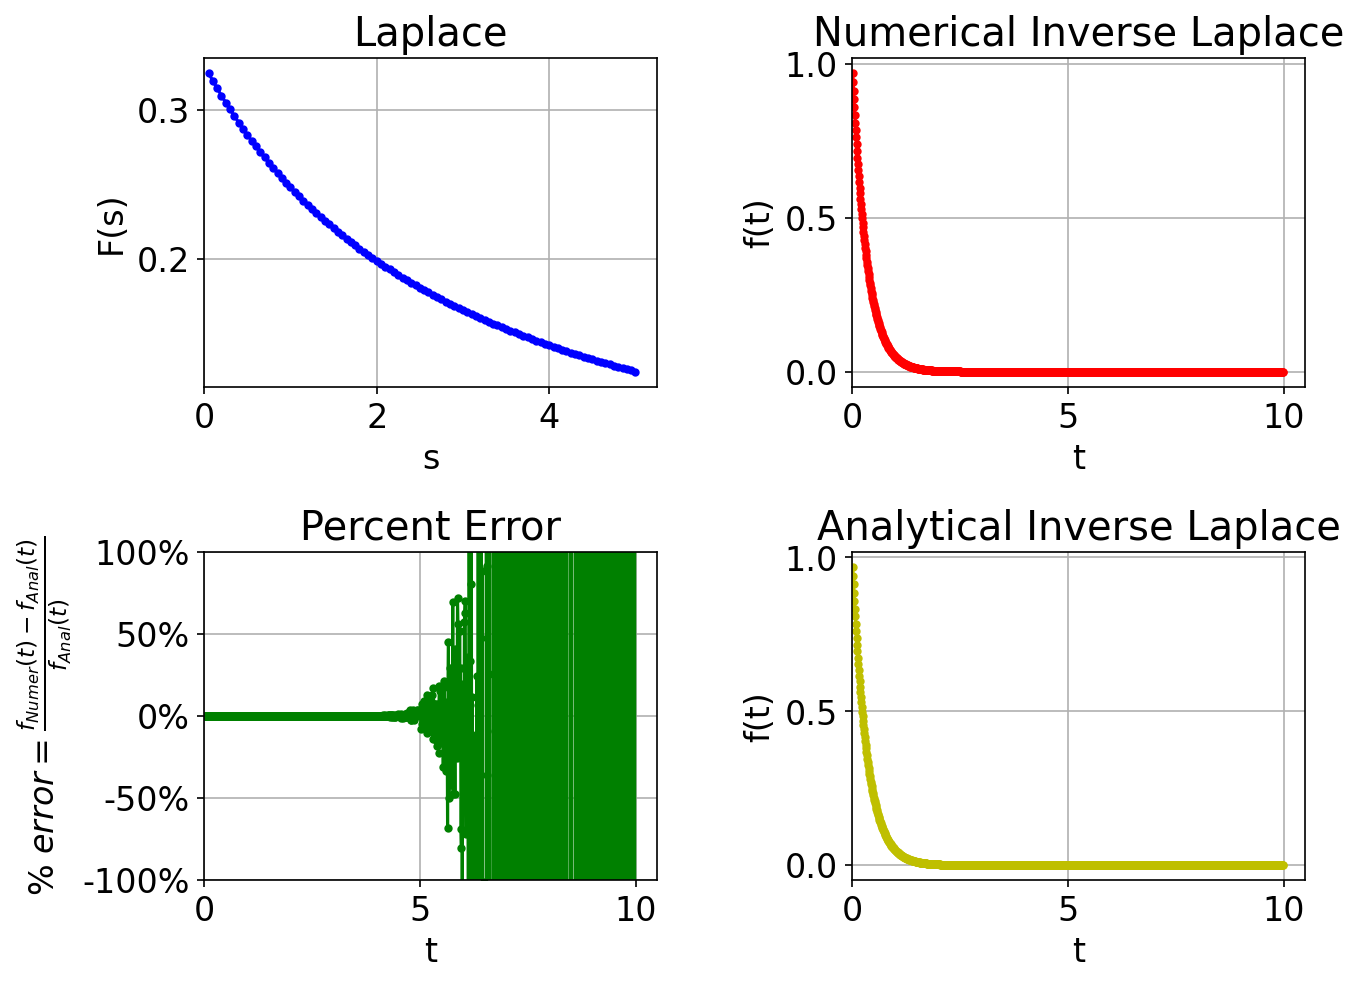

In [ ]:
#@markdown Simple Laplace - Numerical Inversion

anal_offset = 1
# inputting a value of time=0 doesn't error (just returns None/NaN), but takes longer (about 2x as much) on python; not really MATLAB though
times=np.arange(0.1,100,0.1)/10000.0*10*anal_offset
times=np.arange(0.1,100,0.1)/100.0*10*anal_offset

a=-3.03
#func = lambda s: 1/(s-a)
func = lambda s: 1/(s-a)
inv_func_anal = lambda t: np.exp(a*t)

input_times = times
plot_times  = times
func_name = {"t":"f(t)", "s":"F(s)"}
x_names   = {"t":"t", "s":"s"}
s_vals = np.arange(0.05, 5.05, 0.05)
input_times_anal = input_times /anal_offset
plot_times_anal = plot_times /anal_offset


fig=plotting.plot_laplace_analysis(func=func, func_name=func_name, tg=1, x_names=x_names, s_vals=s_vals, input_times=input_times, plot_times=plot_times, input_times_anal=input_times_anal, plot_times_anal=plot_times_anal, inv_func_anal=inv_func_anal )


# Key Points from Prior Paper
Yuan, D., Somers, S.M., Grayson, W.L. et al. A Poroelastic Model of a Fibrous-Porous Tissue Engineering Scaffold. Sci Rep 8, 5043 (2018). https://doi.org/10.1038/s41598-018-23214-8

## Figure 1
<img src="https://media.springernature.com/full/springer-static/image/art%3A10.1038%2Fs41598-018-23214-8/MediaObjects/41598_2018_23214_Fig1_HTML.jpg?as=webp">

## Table 1
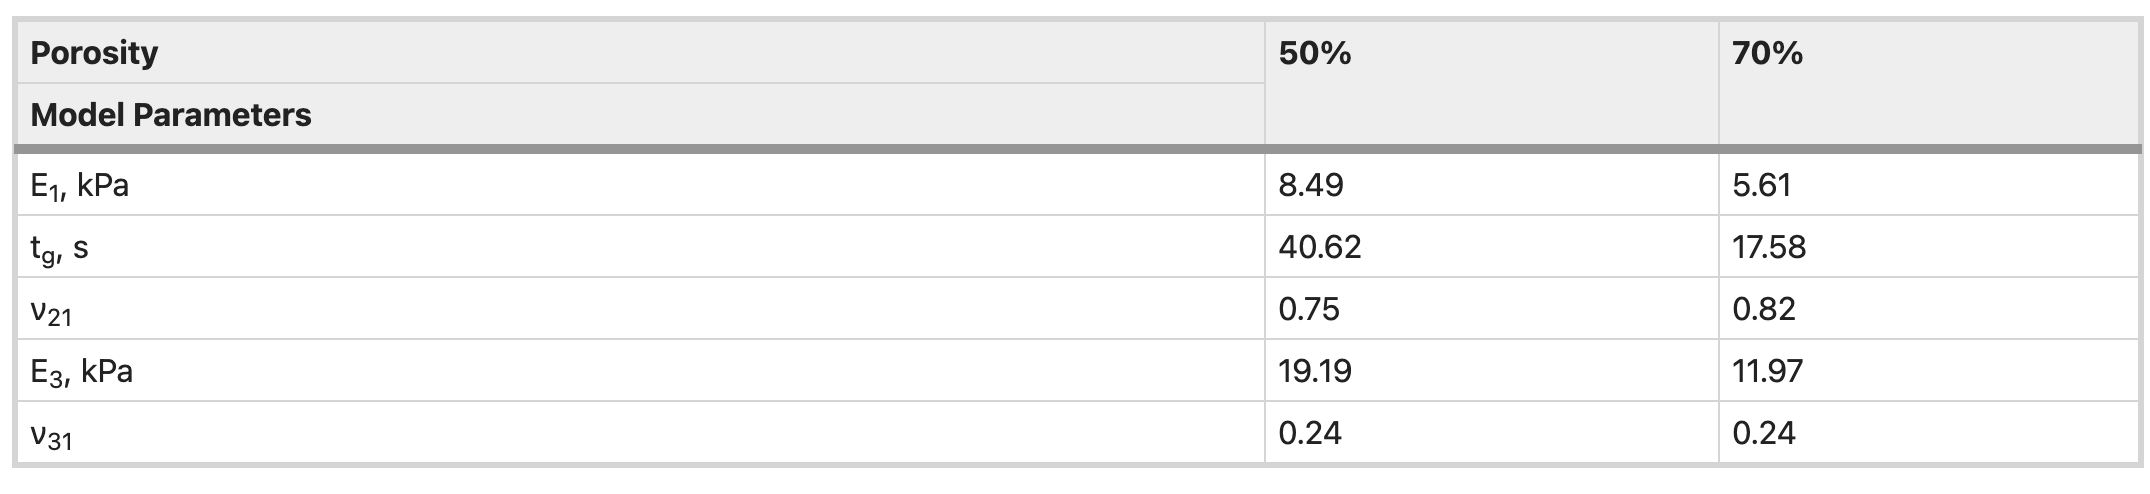

# Viscoporoelastic model inversion

Time taken in sec: 0.039175987243652344
(0.1, 0.1, 0.5, 10)
('eps0', 'strain_rate', 'Vrz', 'Ezz')


,Value,Category
eps0,0.10,Constant
strain_rate,0.10,Constant
Vrz,0.50,Constant
Ezz,10.00,Constant
c,0.00,FittedParam
tau1,0.00,FittedParam
tau2,0.00,FittedParam
tg,40.62,FittedParam
Vrtheta,0.75,FittedParam
Err,8.49,FittedParam


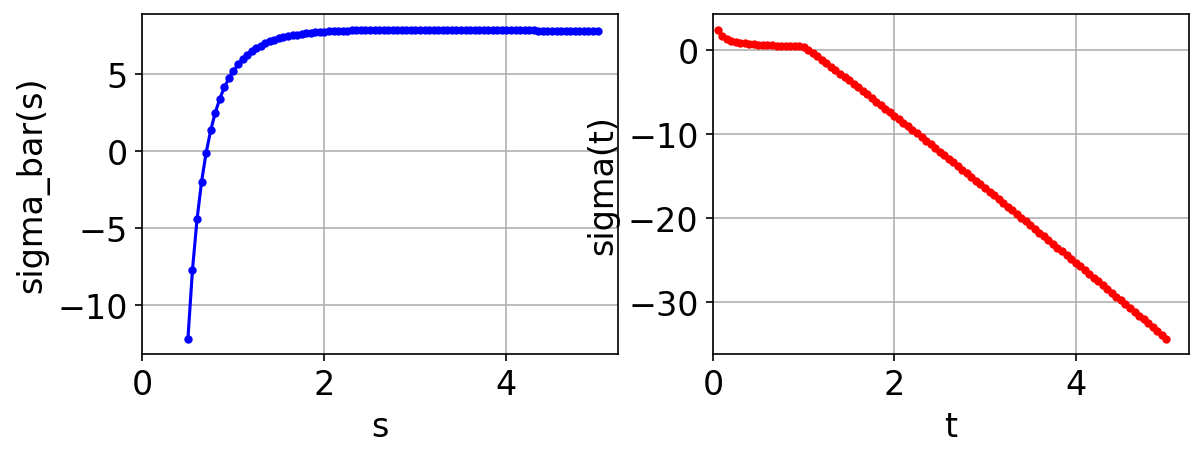

In [54]:
#@markdown Viscoporoelastic Model - Numerical Inversion

import time as timer

importlib.reload(plotting)
importlib.reload(viscoporoelastic_model)

t1=timer.time();

#@markdown Predefined constants
ViscoporoelasticModel.eps0 = 0.1 #@param {type:"number"} ; # 10 percent
ViscoporoelasticModel.strain_rate = 0.1 #@param {type:"number"} ; # 1 percent per s (normally 1#/s)
## Below are directly determined by the mesh deformation part of the
## experiment (see our paper with Daniel).  -Dr. Spector
ViscoporoelasticModel.Vrz = 0.24 #@param {type:"number"} ; # Not actually v, but greek nu (represents Poisson's ratio)
ViscoporoelasticModel.Ezz =   19.19#@param {type:"number"} ; # Note- don't mix up Ezz with epszz

vpe = ViscoporoelasticModel()

#@markdown Fitted parameters (to be determined by experimental fitting to the unknown material)
## Fitted parameters (to be determined by experimental fitting to
# the unknown material)
vpe.c =   0#@param {type:"number"} ;
vpe.tau1 =  0#@param {type:"number"} ;
vpe.tau2 =  0#@param {type:"number"} ;
#tau = [tau1, tau2];
#tau = [1 1];
vpe.tg=40.62 #@param {type:"number"}; #in units of s   # for porosity_sp == 0.5
vpe.Vrtheta =  0.75#@param {type:"number"}; # Not actually v, but greek nu (represents Poisson's ratio)
vpe.Err =  8.49#@param {type:"number"};

# inputting a value of time=0 doesn't error (just returns None/NaN), but takes longer (about 2x as much) on python; not really MATLAB though
times=np.array([2,3])
times = np.arange(0.05, 5.05, 0.05)
input_times = times
plot_times  = times
func = vpe.laplace_value
func_name = {"t":"sigma(t)", "s":"sigma_bar(s)"}
x_names   = {"t":"t", "s":"s"}
s_vals = np.arange(0.5, 5.05, 0.05)

import time as timer
t1=timer.time();
inverted_vals=euler_inversion(func, input_times)
t2=timer.time()-t1
print("Time taken in sec:", t2)

#%%
# Non-positive s values give an error "invalid value encountered in sqrt"
laplace_vals = func(s_vals)

##%%
import matplotlib.pyplot as plt
fig, axs = plt.subplots(1,2)
fig.set_figwidth(9)
fig.set_figheight(3)
fig.set_dpi(150)

axs[0].plot(s_vals, laplace_vals, ".-b")
axs[0].set_xlabel(x_names["s"])
# theoretically, there should be no limit on s, but non-positive values throw an error in the function
axs[0].set_xlim([0, None])
axs[0].set_ylabel(func_name["s"])
axs[0].grid()

axs[1].plot(plot_times, inverted_vals, ".-r")
axs[1].set_xlabel(x_names["t"])
axs[1].set_xlim([0, None])
axs[1].set_ylabel(func_name["t"])    
axs[1].grid()

#axs[0].show()

fig.show()


x1=np.arange(10)
y1=np.random.random(10)
x2=np.arange(4,12)
y2=np.random.random(8)
df1 = pd.DataFrame({'Constant':vpe.get_predefined_constant_names(),'Value':vpe.get_predefined_constants()})
df2 = pd.DataFrame({'Fitted':vpe.get_fitted_parameter_names(),'Value':vpe.get_fitted_parameters()})
df3 = pd.DataFrame({'Value':vpe.get_predefined_constants()+vpe.get_fitted_parameters(),"Category":vpe.get_var_categories()}, index=vpe.get_predefined_constant_names()+vpe.get_fitted_parameter_names())
df3

# Test Model 1 - Numerical Inversion

Time taken in sec: 0.014046907424926758
       alpha  ...                             _abc_impl
value    0.5  ...  <_abc_data object at 0x7f76298c9900>

[1 rows x 7 columns]


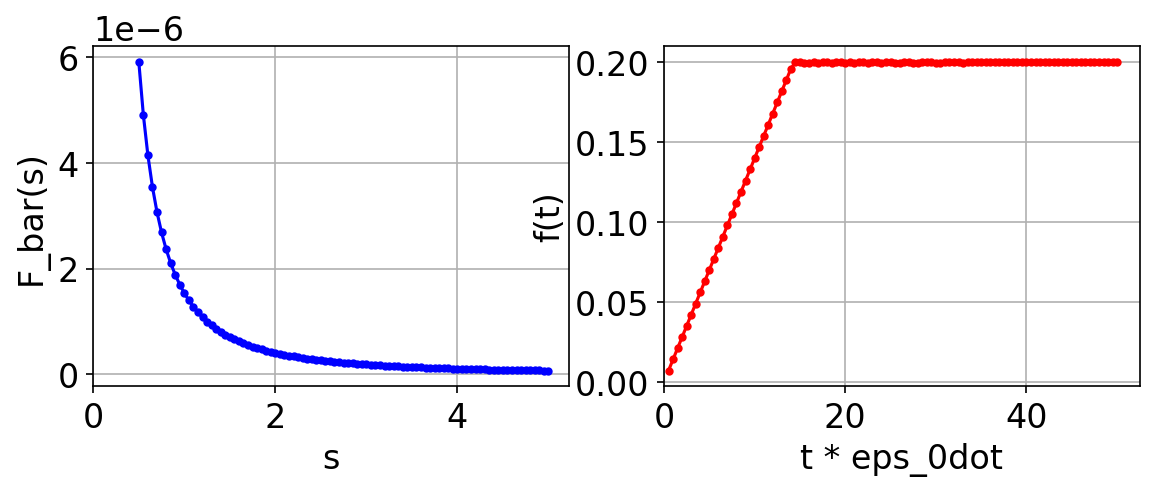

In [55]:
#@markdown Test Model - Numerical Inversion

# inputting a value of time=0 doesn't error (just returns None/NaN), but takes longer (about 2x as much) on python; not really MATLAB though
times=np.array([2,3])
times = np.arange(0.05, 5.05, 0.05)*100000

tm = viscoporoelastic_model.TestModel1()
func = tm.laplace_value
input_times = times
plot_times  = times * tm.strain_rate
func_name = {"t":"f(t)", "s":"F_bar(s)"}
x_names   = {"t":"t * eps_0dot", "s":"s"}
s_vals = np.arange(0.5, 5.05, 0.05)


import time as timer
t1=timer.time();
inverted_vals=euler_inversion(func, input_times)
t2=timer.time()-t1
print("Time taken in sec:", t2)

#%%
# Non-positive s values give an error "invalid value encountered in sqrt"
laplace_vals = func(s_vals)

##%%
import matplotlib.pyplot as plt
fig, axs = plt.subplots(1,2)
fig.set_figwidth(9)
fig.set_figheight(3)
fig.set_dpi(150)

axs[0].plot(s_vals, laplace_vals, ".-b")
axs[0].set_xlabel(x_names["s"])
# theoretically, there should be no limit on s, but non-positive values throw an error in the function
axs[0].set_xlim([0, None])
axs[0].set_ylabel(func_name["s"])
axs[0].grid()

axs[1].plot(plot_times, inverted_vals, ".-r")
axs[1].set_xlabel(x_names["t"])
axs[1].set_xlim([0, None])
axs[1].set_ylabel(func_name["t"])    
axs[1].grid()

#axs[0].show()

fig.show()

vars={key:value for key,value in viscoporoelastic_model.TestModel.__dict__.items() if not key.startswith("__") and not callable(value)}
print(pd.DataFrame(vars,index=["value"]))

# Test Model 2 - Numerical & Analytical Inversion

Time taken in sec: 0.09624171257019043


,t/tg,f(t)_Numerical,f(t)_Analytic
0,0.01,-0.002882,-0.587811
1,0.02,-0.002831,-0.558588
2,0.03,-0.002790,-0.535413
3,0.04,-0.002756,-0.516464
4,0.05,-0.002725,-0.500551
...,...,...,...
394,3.95,-0.002000,-0.198084
395,3.96,-0.002000,-0.198081
396,3.97,-0.002000,-0.198078
397,3.98,-0.002000,-0.198075


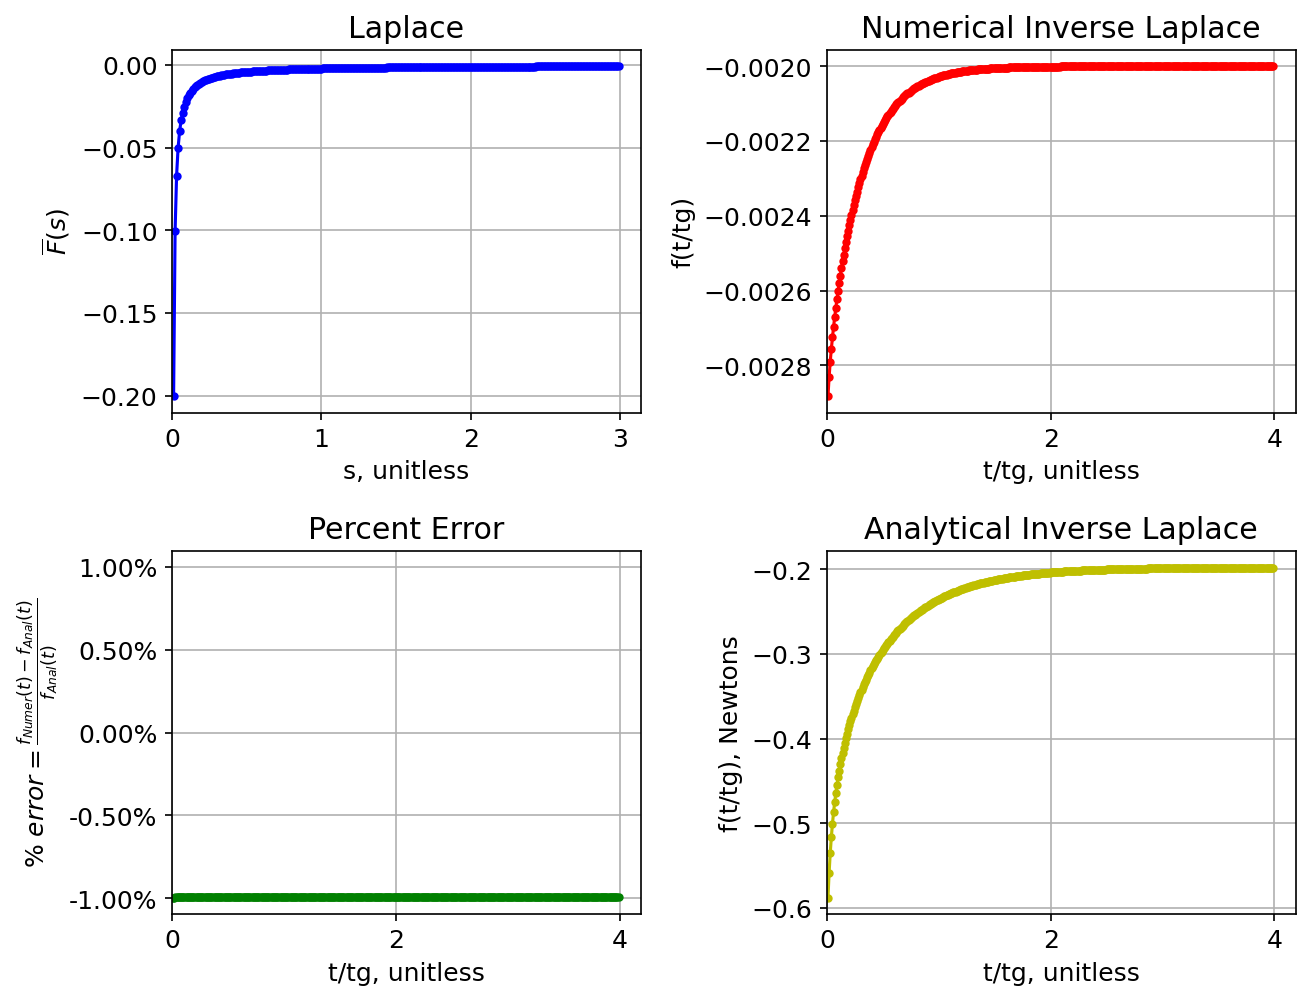

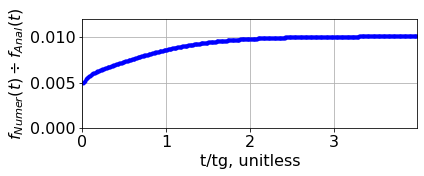

In [56]:
#@markdown Test Model 2 - Numerical & Analytical Inversion

importlib.reload(plotting)
importlib.reload(viscoporoelastic_model)

#anal_offset = 1/7000.0 #0.0001
anal_offset = 1



tm = viscoporoelastic_model.TestModel2()
tg = tm.tg

# inputting a value of time=0 doesn't error (just returns None/NaN), but takes longer (about 2x as much) on python; not really MATLAB though
#times=np.arange(0.1,100,0.1)/100.0
#times = np.arange(0.05, 5.05, 0.05)
#times=np.arange(0.001,2,0.01)
times=np.arange(100,7000*4,100)
times=np.arange(0.01,4,0.01)*tg

func = tm.laplace_value 
#func = lambda s: tm.laplace_value(s)*s
input_times = times
plot_times  = times/tg 
func_name = {"t":"f(t/tg)", "s":r"$\overline{F}(s)$","t_anal":f"f(t/tg), {tm.inverted_value_units()}"}
#func_name = {"t":"f(t/tg)", "s":r"$s\cdot\overline{F}(s)$","t_anal":f"f(t/tg), {tm.inverted_value_units()}"}
#func_name = {"t":"f(t)", "s":"F_bar(s)","t_anal":"f(t*0.01)*0.01"}
x_names   = {"t":"t/tg, unitless", "s":"s, unitless","t_anal":"t/tg, unitless"}
s_vals = np.arange(0.01, 3.0, 0.01)
inv_func_anal = tm.inverted_value #lambda t: tm.inverted_value(t*0.01)*0.01
#inv_func_anal = lambda t: tm.inverted_value(t/0.00001)/100
#inv_func_anal = lambda t: tm.inverted_value(t)/100
input_times_anal = input_times /anal_offset
plot_times_anal = plot_times /anal_offset

plt.rc('font', size=12)  # default font size is 10
fig, laplace_vals, inverted_vals_numerical, inverted_vals_analytical=plotting.plot_laplace_analysis(
    func=func, func_name=func_name, x_names=x_names, s_vals=s_vals, 
    input_times=input_times, plot_times=plot_times, tg=tg,
    input_times_anal=input_times_anal, plot_times_anal=plot_times_anal, 
    inv_func_anal=inv_func_anal, Marg=32 )


plt.figure(figsize=(6, 2))
plt.rc('font', size=16)  # default font size is 10
plt.grid()
plt.plot(plot_times,inverted_vals_numerical/inverted_vals_analytical, ".-b")
#plt.plot(inverted_vals_numerical,inverted_vals_analytical)
plt.xlim([0, max(plot_times)])
plt.ylim([0, 0.012])
plt.xlabel("t/tg, unitless")
#plt.ylabel(r"$\frac{f_{Numer}(t)}{f_{Anal}(t)}$")
plt.ylabel(r"$f_{Numer}(t) \div f_{Anal}(t)$")

#vars={key:value for key,value in viscoporoelastic_model.TestModel2.__dict__.items() if not key.startswith("__") and not callable(value)}
#print(pd.DataFrame(vars,index=["value"]))

#print(inverted_vals_numerical)

# creating a DataFrame
dict = {'t/tg' : plot_times,
        'f(t)_Numerical' : inverted_vals_numerical,
        'f(t)_Analytic' : inverted_vals_analytical}
df = pd.DataFrame(dict)
  
# displaying the DataFrame
display(df)

#Test Model 3 - Numerical & Analytical Inversion


Time taken in sec: 0.07086420059204102


Text(0, 0.5, '$f_{Numer}(t) \\div f_{Anal}(t)$')

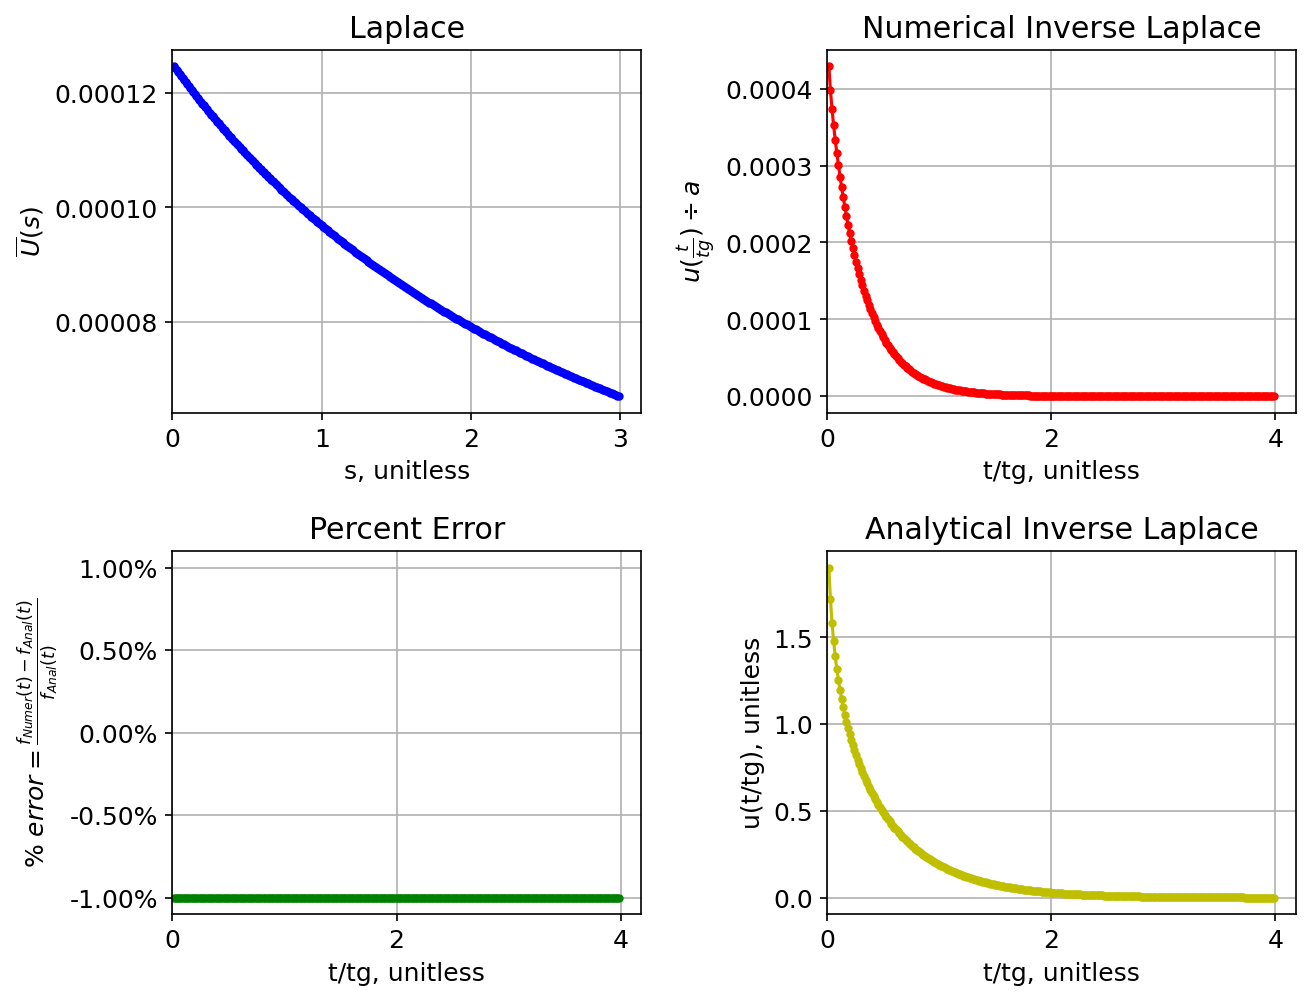

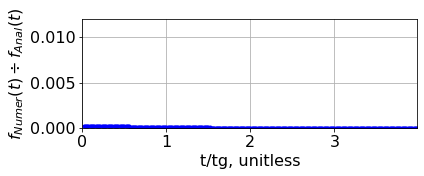

In [57]:
#@markdown Test Model 3 - Numerical & Analytical Inversion

importlib.reload(plotting)
importlib.reload(viscoporoelastic_model)

#anal_offset = 1/7000.0 #0.0001
anal_offset = 1


tm = viscoporoelastic_model.TestModel3()
# inputting a value of time=0 doesn't error (just returns None/NaN), but takes longer (about 2x as much) on python; not really MATLAB though
#times=np.arange(0.1,100,0.1)/100.0
#times = np.arange(0.05, 5.05, 0.05)
#times=np.arange(0.001,2,0.01)
times=np.arange(100,7000*4,100)
tg = tm.tg
func = tm.laplace_value 
#func = lambda s: tm.laplace_value(s)*s
input_times = times
plot_times  = times/tg 
#func_name = {"t":r"$u(t/tg)\div a$", "s":r"$\overline{U}(s)$","t_anal":f"u(t/tg), {tm.inverted_value_units()}"}
func_name = {"t":r"$u(\frac{t}{tg})\div a$", "s":r"$\overline{U}(s)$","t_anal":f"u(t/tg), {tm.inverted_value_units()}"}
#func_name = {"t":r"$\frac{u(\frac{t}{tg})}{a}$", "s":r"$\overline{U}(s)$","t_anal":f"u(t/tg), {tm.inverted_value_units()}"}
x_names   = {"t":"t/tg, unitless", "s":"s, unitless","t_anal":"t/tg, unitless"}
s_vals = np.arange(0.01, 3.0, 0.01)
inv_func_anal = tm.inverted_value #lambda t: tm.inverted_value(t*0.01)*0.01
#inv_func_anal = lambda t: tm.inverted_value(t/0.00001)/100
#inv_func_anal = lambda t: tm.inverted_value(t)/100
input_times_anal = input_times /anal_offset
plot_times_anal = plot_times /anal_offset

plt.rc('font', size=12)  # default font size is 10
fig, laplace_vals, inverted_vals_numerical, inverted_vals_analytical=plotting.plot_laplace_analysis(
    func=func, func_name=func_name, x_names=x_names, s_vals=s_vals, 
    input_times=input_times, plot_times=plot_times, tg=tg,
    input_times_anal=input_times_anal, plot_times_anal=plot_times_anal, 
    inv_func_anal=inv_func_anal, Marg=32 )


plt.figure(figsize=(6, 2))
plt.rc('font', size=16)  # default font size is 10
plt.grid()
plt.plot(plot_times,inverted_vals_numerical/inverted_vals_analytical, ".-b")
#plt.plot(inverted_vals_numerical,inverted_vals_analytical)
plt.xlim([0, max(plot_times)])
plt.ylim([0, 0.012])
plt.xlabel("t/tg, unitless")
#plt.ylabel(r"$\frac{f_{Numer}(t)}{f_{Anal}(t)}$")
plt.ylabel(r"$f_{Numer}(t) \div f_{Anal}(t)$")


,vs,tg,Es,eps0,a,alpha
Line #1 (vs=0),0.0,7000.0,7000000.0,0.001,0.003,0.500000
Line #2 (vs=0.2),0.2,7000.0,7000000.0,0.001,0.003,0.250000
Line #3 (vs=0.4),0.4,7000.0,7000000.0,0.001,0.003,0.071429


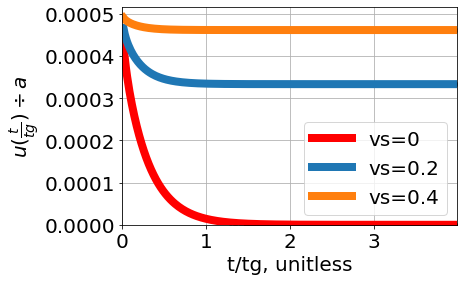

In [67]:
#@markdown Test Model 3 - Numerical Inversion - with varying parameters

importlib.reload(plotting)
importlib.reload(viscoporoelastic_model)

#anal_offset = 1/7000.0 #0.0001
anal_offset = 1


tm = viscoporoelastic_model.TestModel3()
# inputting a value of time=0 doesn't error (just returns None/NaN), but takes longer (about 2x as much) on python; not really MATLAB though
#times=np.arange(0.1,100,0.1)/100.0
#times = np.arange(0.05, 5.05, 0.05)
#times=np.arange(0.001,2,0.01)
times=np.arange(100,7000*4,100)
tg = tm.tg
func = tm.laplace_value 
#func = lambda s: tm.laplace_value(s)*s
input_times = times
plot_times  = times/tg 
#func_name = {"t":r"$u(t/tg)\div a$", "s":r"$\overline{U}(s)$","t_anal":f"u(t/tg), {tm.inverted_value_units()}"}
func_name = {"t":r"$u(\frac{t}{tg})\div a$", "s":r"$\overline{U}(s)$","t_anal":f"u(t/tg), {tm.inverted_value_units()}"}
#func_name = {"t":r"$\frac{u(\frac{t}{tg})}{a}$", "s":r"$\overline{U}(s)$","t_anal":f"u(t/tg), {tm.inverted_value_units()}"}
x_names   = {"t":"t/tg, unitless", "s":"s, unitless","t_anal":"t/tg, unitless"}
s_vals = np.arange(0.01, 3.0, 0.01)


dfs = []


plt.figure(figsize=(6, 4))
plt.rc('font', size=20)  # default font size is 10
plt.grid()

for ind, vs in enumerate([0, 0.2, 0.4]):
  type(tm).vs = vs
  inverted_vals_numerical = euler_inversion(func, input_times/tg, Marg=None)
  laplace_vals = func(s_vals)
  #p=plt.plot(plot_times,inverted_vals_numerical, "rmg"[ind]+_".-", linewidth=8,label=f"vs={vs}")
  p=plt.plot(plot_times,inverted_vals_numerical, ["r","",""][ind]+".-", linewidth=8,label=f"vs={vs}")
  vars = tm.get_all_names_and_vars()
  #vars={key:getattr(tm,key) for key in dir(tm) if not key.startswith("__") and not callable(getattr(tm,key))}
  #display(pd.DataFrame(vars,index=["value"]))
  #display(pd.DataFrame(vars,index=[str(p[0].get_color())]))
  dfs.append(pd.DataFrame(vars,index=[f"Line #{ind+1} (vs={vs})"]))
  #display(dfs[-1])

plt.xlim([0, max(plot_times)])
plt.ylim([0, None])
plt.xlabel(x_names["t"])
#plt.xlim([0, None])
plt.ylabel(func_name["t"])
#plt.xlabel("t/tg, unitless")
plt.legend();
plt.yticks(np.linspace(0,0.0005,5+1))
ax = plt.gca()
ax.yaxis.get_ticklocs(minor=True)


display(pd.concat(dfs))



s=0.001, vs=0.00, s*func(s)=0.000000
s=0.001, vs=0.20, s*func(s)=0.000333
s=0.001, vs=0.40, s*func(s)=0.000462


,vs,tg,Es,eps0,a,alpha
vs=0,0.0,7000.0,7000000.0,0.001,0.003,0.500000
vs=0.2,0.2,7000.0,7000000.0,0.001,0.003,0.250000
vs=0.4,0.4,7000.0,7000000.0,0.001,0.003,0.071429


,at vs=0,at vs=0.2,at vs=0.4
ε0/2,0.000500,0.000500,0.000500
u(t/tg=0.0010)/a,0.000482,0.000491,0.000497
s*U(s) at s=100.0,0.000448,0.000475,0.000493
u(t/tg=4.00)/a,0.000000,0.000333,0.000462
s*U(s) at s=0.001,0.000000,0.000333,0.000462
ε0*3vs/(1+4vs),0.000000,0.000333,0.000462


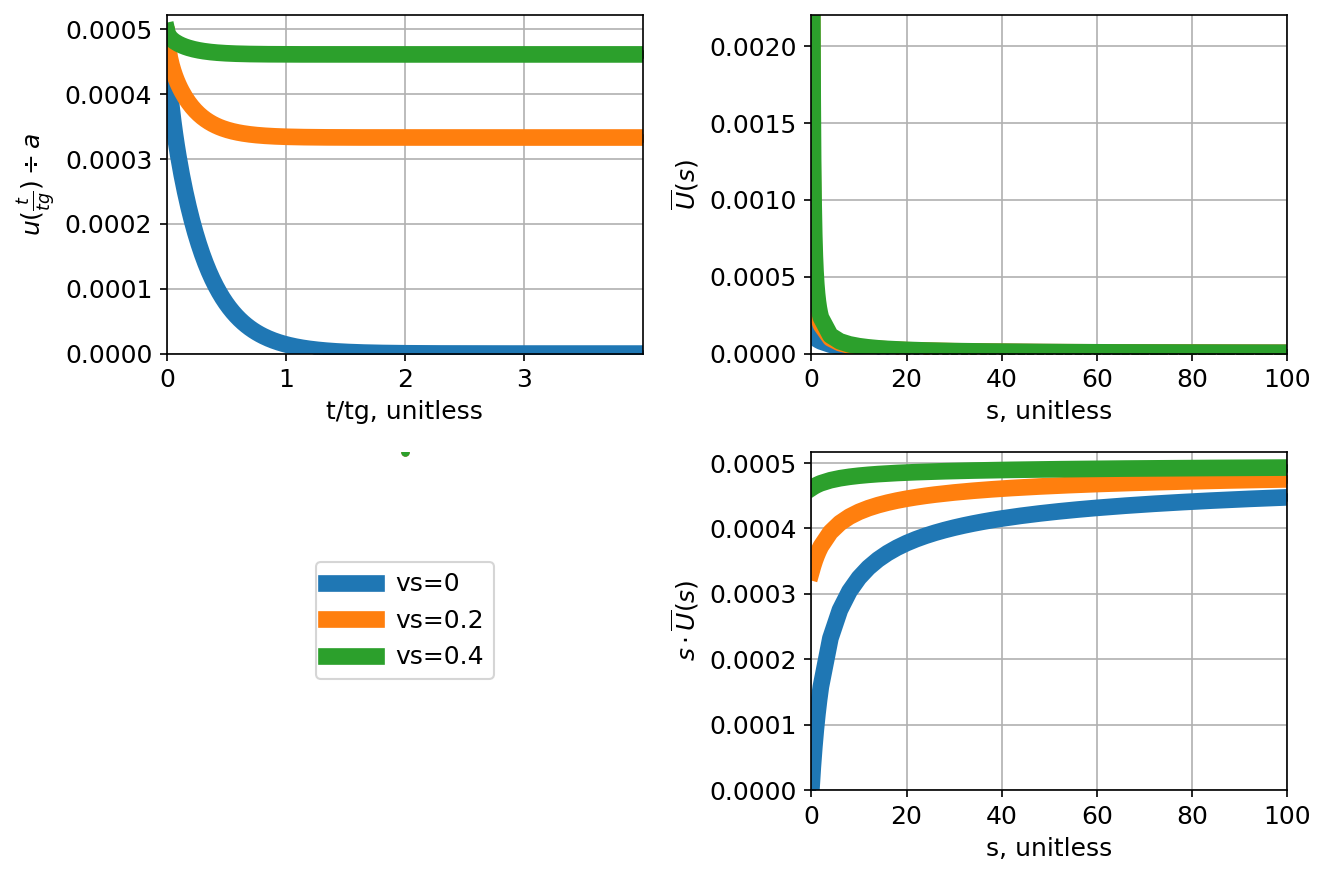

In [79]:
#@markdown Test Model 3 - Numerical & Analytical Inversion - with varying parameters - Additional Plots

importlib.reload(plotting)
importlib.reload(viscoporoelastic_model)

#anal_offset = 1/7000.0 #0.0001
anal_offset = 1


tms = [] #
for vs in [0, 0.2, 0.4]:
  tms.append(viscoporoelastic_model.TestModel3())
  tms[-1].vs = vs
tm=tms[0]
# inputting a value of time=0 doesn't error (just returns None/NaN), but takes longer (about 2x as much) on python; not really MATLAB though
#times=np.arange(0.1,100,0.1)/100.0
#times = np.arange(0.05, 5.05, 0.05)
#times=np.arange(0.001,2,0.01)
#times=np.arange(70,7000*4,100)
#times=np.hstack([np.arange(70,7000*4,100),np.arange(7000*4,7000*40,7000*4)])
times=np.hstack([np.arange(0.7*10,70,0.7),np.arange(70,7000*4,100)])
tg = tm.tg
func = tm.laplace_value 
#func = lambda s: tm.laplace_value(s)*s
input_times = times
plot_times  = times/tg 
#func_name = {"t":r"$u(t/tg)\div a$", "s":r"$\overline{U}(s)$","t_anal":f"u(t/tg), {tm.inverted_value_units()}"}
func_name = {"t":r"$u(\frac{t}{tg})\div a$", "s":r"$\overline{U}(s)$","t_anal":f"u(t/tg), {tm.inverted_value_units()}"}
#func_name = {"t":r"$\frac{u(\frac{t}{tg})}{a}$", "s":r"$\overline{U}(s)$","t_anal":f"u(t/tg), {tm.inverted_value_units()}"}
x_names   = {"t":"t/tg, unitless", "s":"s, unitless","t_anal":"t/tg, unitless"}
#s_vals = np.arange(0.01, 10.0, 0.01)
s_vals = np.hstack([np.arange(0.01, 2, 0.01), np.arange(2, 102, 2)])




fig, axs = plt.subplots(2,2)
plt.rc('font', size=12)  # default font size is 10
fig.set_figwidth(9)
fig.set_figheight(6)
fig.set_dpi(150)

inverted_vals_numericals = []
ax = axs[0,0]
ax.grid()
for tm in tms:
  func = tm.laplace_value 
  inverted_vals_numerical = euler_inversion(func, input_times/tg, Marg=None)
  p=ax.plot(plot_times,inverted_vals_numerical, ".-", linewidth=8,label=f"vs={tm.vs}")
  inverted_vals_numericals.append(inverted_vals_numerical)
ax.set_yticks(np.linspace(0,0.0005,5+1))
ax.set_xlim([0, max(plot_times)])
ax.set_ylim([0, None])
ax.set_xlabel(x_names["t"])
ax.set_ylabel(func_name["t"])
#ax.legend();


ax = axs[0,1]
ax.grid()
for tm in tms:
  func = tm.laplace_value 
  laplace_vals = func(s_vals)
  p=ax.plot(s_vals,laplace_vals, ".-", linewidth=8,label=f"vs={tm.vs}")
ax.set_xlim([0, max(s_vals)])
#ax.set_ylim([0, None])
ax.set_ylim([0, max(laplace_vals[s_vals>0.2])])
ax.set_xlabel(x_names["s"])
ax.set_ylabel(func_name["s"])
#ax.legend();


ax = axs[1,0]
ax.axis('off')
for tm in tms:
  ax.plot(-1,1, ".-", linewidth=8,label=f"vs={tm.vs}")
ax.set_ylim([0, 1])
ax.legend(loc='center');


ax = axs[1,1]
ax.grid()
for tm in tms:
  func = tm.laplace_value 
  laplace_vals = func(s_vals)
  p=ax.plot(s_vals,s_vals*laplace_vals, ".-", linewidth=8,label=f"vs={tm.vs}")
ax.set_xlim([0, max(s_vals)])
ax.set_ylim([0, None])
ax.set_xlabel(x_names["s"])
ax.set_ylabel(r"$s\cdot$"+func_name["s"])
#ax.legend();


fig.tight_layout()


s_temp=0.001
for tm in tms:
  print(f"s={s_temp}, vs={tm.vs:0.2f}, s*func(s)={s_temp*tm.laplace_value(s=s_temp):0.6f}")



#varss=[{key:getattr(tm,key) for key in dir(tm) if not key.startswith("__") and not callable(getattr(tm,key))} for tm in tms]
varss=[tm.get_all_names_and_vars() for tm in tms]
#display(pd.DataFrame(vars,index=["value"]))
#display(pd.DataFrame(vars,index=[str(p[0].get_color())]))
display(pd.DataFrame(varss,index=[f"vs={tm.vs}" for tm in tms]))

varss=[
       {  
           f"ε0/2": tm.eps0/2,
           f"u(t/tg={times[0]/tg:0.4f})/a": inverted_vals_numericals[ind][0],
            f"s*U(s) at s={s_vals[-1]:0.1f}": np.round(s_vals[-1]*tm.laplace_value(s=s_vals[-1]), 6),
           f"u(t/tg={times[-1]/tg:0.2f})/a": np.round(inverted_vals_numericals[ind][-1], 6),
           f"s*U(s) at s={s_temp:0.3f}": np.round(s_temp*tm.laplace_value(s=s_temp), 6),
           f"ε0*3vs/(1+4vs)":       np.round(tm.eps0*3*tm.vs/(1+4*tm.vs), 6)
        } 
       for ind,tm in enumerate(tms)]
df = pd.DataFrame(varss,index=[f"at vs={tm.vs}" for tm in tms])
#df = df.style.set_properties( **{'width-min': '5000px'})
#df = df.apply(lambda x: '%.5f' % x)
display(df.transpose())

# Test Model 4 - Numerical Inversion

Time taken in sec: 0.15548944473266602


,v,strain_rate,t0/tg,tg,t0,eps0,C0
Line #1 (v=0),0.0,0.0003,0.1,1000,100.0,0.03,1.000000
Line #2 (v=0.2),0.2,0.0003,0.1,1000,100.0,0.03,0.750000
Line #3 (v=0.4),0.4,0.0003,0.1,1000,100.0,0.03,0.333333


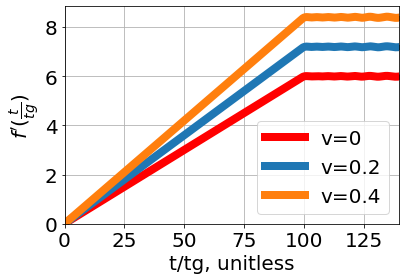

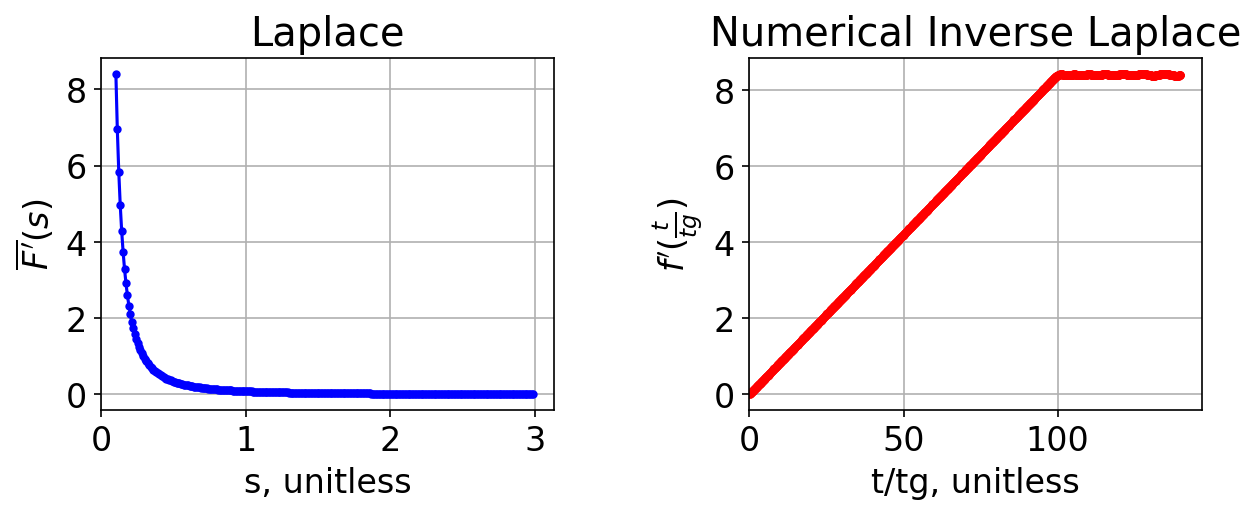

In [105]:
#@markdown Test Model 4 - Numerical Inversion

importlib.reload(plotting)
importlib.reload(viscoporoelastic_model)

#anal_offset = 1/7000.0 #0.0001
anal_offset = 1


tm = viscoporoelastic_model.TestModel4()
# inputting a value of time=0 doesn't error (just returns None/NaN), but takes longer (about 2x as much) on python; not really MATLAB though
#times=np.arange(0.1,100,0.1)/100.0
#times = np.arange(0.05, 5.05, 0.05)
#times=np.arange(0.001,2,0.01)
times=np.arange(100,7000*4*5,100)
tg = tm.tg
func = tm.laplace_value 
#func = lambda s: tm.laplace_value(s)*s
input_times = times
plot_times  = times/tg 
func_name = {"t":r"$f'(\frac{t}{tg})$", "s":r"$\overline{F'}(s)$","t_anal":f"f'(t/tg), {tm.inverted_value_units()}"}
x_names   = {"t":"t/tg, unitless", "s":"s, unitless","t_anal":"t/tg, unitless"}
s_vals = np.arange(0.1, 3.0, 0.01)

dfs = []


#eps_0=0.03;   t_g=1000 s;   t_0=0.1 t_g;   eps_0_dot=0.0003 1/s; v=0; 0.2 ;and 0.4.


plt.figure(figsize=(6, 4))
plt.rc('font', size=20)  # default font size is 10
plt.grid()

for ind, v in enumerate([0, 0.2, 0.4]):
  tm.v = v
  inverted_vals_numerical = euler_inversion(func, input_times/tg, Marg=None)
  laplace_vals = func(s_vals)
  #p=plt.plot(plot_times,inverted_vals_numerical, "rmg"[ind]+".-", linewidth=8,label=f"vs={vs}")
  p=plt.plot(plot_times,inverted_vals_numerical, ["r","",""][ind]+".-", linewidth=8,label=f"v={v}")
  vars = tm.get_all_names_and_vars()
  #vars={key:getattr(tm,key) for key in dir(tm) if not key.startswith("__") and not callable(getattr(tm,key))}
  #dfs.append(pd.DataFrame(vars,index=["value"]))
  #dfs.append(pd.DataFrame(vars,index=[str(p[0].get_color())]))
  dfs.append(pd.DataFrame(vars,index=[f"Line #{ind+1} (v={v})"]))

plt.xlim([0, max(plot_times)])
plt.ylim([0, None])
plt.xlabel(x_names["t"])
#plt.xlim([0, None])
plt.ylabel(func_name["t"])
#plt.xlabel("t/tg, unitless")
plt.legend();
#plt.yticks(np.linspace(0,0.0005,5+1))
ax = plt.gca()
ax.yaxis.get_ticklocs(minor=True)


plt.rc('font', size=16)  # default font size is 10
fig, laplace_vals, inverted_vals_numerical, inverted_vals_analytical=plotting.plot_laplace_analysis(
    func=func, func_name=func_name, x_names=x_names, s_vals=s_vals, 
    input_times=input_times, plot_times=plot_times, tg=tg )

display(pd.concat(dfs))


# Laplace function relevant properties - for diagnosing errors
## Sources:
*   https://lpsa.swarthmore.edu/LaplaceXform/FwdLaplace/LaplaceProps.html
*   https://lpsa.swarthmore.edu/LaplaceZTable/Common%20Laplace%20Transform%20Pairs.pdf

## Properties:  
1. Initial Value Theorem   
image.png

1. Final Value Theorem   
image.png

1. Time scaling.  
![image.png](https://lpsa.swarthmore.edu/LaplaceXform/FwdLaplace/Funcs/imgB1.gif)

1. Multiplication by time.  
![image.png](https://lpsa.swarthmore.edu/LaplaceXform/FwdLaplace/Funcs/imgAF.gif)

# Diagnose Potential Errors in Numerical Inversion

In [91]:
print(viscoporoelastic_model.TestModel2().tg)
print(f"{np.round(1/0.0001)}-{np.round(1/0.00001)}")

7000.0
10000.0-100000.0


bessel_len=10000
	 Sum/a=4.1417 	 at t=  0.0,	 tg=7000.0,	 t/tg=0.0000
	 Sum/a=2.1058 	 at t= 70.0,	 tg=7000.0,	 t/tg=0.0100
	 Sum/a=1.7231 	 at t=210.0,	 tg=7000.0,	 t/tg=0.0300
	 Sum/a=1.2528 	 at t=700.0,	 tg=7000.0,	 t/tg=0.1000
	 Sum/a=0.7452 	 at t=2100.0,	 tg=7000.0,	 t/tg=0.3000


,N,α^2,diff,N*pi-α^2,exp(-α^2*0.00)/(α^2-1),exp(-α^2*0.01)/(α^2-1),exp(-α^2*0.03)/(α^2-1),exp(-α^2*0.10)/(α^2-1),exp(-α^2*0.30)/(α^2-1),Sum so far at t/tg=0.00,Sum so far at t/tg=0.01,Sum so far at t/tg=0.03,Sum so far at t/tg=0.10,Sum so far at t/tg=0.30
0,1,1.841184,None,1.300409,1.188801,1.167113e+00,1.124917,0.988889,0.684265,1.188801,1.167113,1.124917,0.988889,0.684265
1,2,5.331443,3.49026,0.951743,0.230870,2.188836e-01,0.196746,0.135465,0.046638,1.419671,1.385997,1.321663,1.124354,0.730903
2,3,8.536316,3.20487,0.888462,0.132691,1.218339e-01,0.102712,0.056508,0.010248,1.552362,1.507831,1.424375,1.180862,0.741152
3,4,11.706005,3.16969,0.860366,0.093406,8.308718e-02,0.065744,0.028973,0.002788,1.645767,1.590918,1.490119,1.209835,0.743939
4,5,14.863589,3.15758,0.844375,0.072131,6.216882e-02,0.046182,0.016316,0.000835,1.717899,1.653087,1.536301,1.226150,0.744774
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,31402.574739,3.14159,0.785426,0.000032,1.328615e-141,0.000000,0.000000,0.000000,4.141602,2.105837,1.723079,1.252821,0.745169
9996,9997,31405.716332,3.14159,0.785426,0.000032,1.287396e-141,0.000000,0.000000,0.000000,4.141634,2.105837,1.723079,1.252821,0.745169
9997,9998,31408.857925,3.14159,0.785426,0.000032,1.247455e-141,0.000000,0.000000,0.000000,4.141666,2.105837,1.723079,1.252821,0.745169
9998,9999,31411.999517,3.14159,0.785426,0.000032,1.208753e-141,0.000000,0.000000,0.000000,4.141697,2.105837,1.723079,1.252821,0.745169


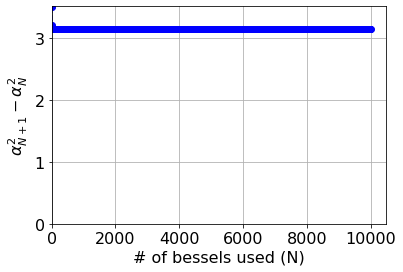

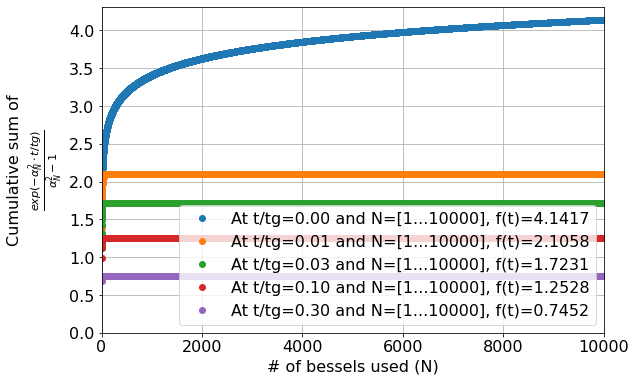

In [86]:
#import scipy.special as sp
import scipy.special
import scipy as sp
import pandas as pd

self = viscoporoelastic_model.TestModel3()
vs, tg, Es, eps0, a = self.get_parameters()
bessel_len=10000 #100000
off=0
times=np.array([0.00,0.01,0.03,0.1,0.3])*tg


def I0(x): return scipy.special.iv(0, x) #return np.i0(x); #besseli(0, x)
def I1(x): return scipy.special.iv(1, x) #besseli(1, x)
def J0(x): return scipy.special.jv(0, x)
def J1(x): return scipy.special.jv(1, x)

def characteristic_eqn(x):
    return J1(x) - (1 - vs) / (1 - 2 * vs) * x * J0(x)

alpha2_vals = np.zeros(shape=bessel_len)
for n in range(bessel_len):
    # Use (n+1)*pi instead of n*pi bc python is zero-indexed unlike Matlab
    alpha2_vals[n] = sp.optimize.fsolve(func=characteristic_eqn, x0=(n + 1 -off) * np.pi)


summation_a = np.zeros(shape=len(times))
cumsum = np.zeros(shape=(bessel_len, len(times)))
parts = np.zeros(shape=(bessel_len, len(times)) )
print(f"bessel_len={bessel_len}")
for t_ind in range(len(times)):
  t = times[t_ind]
  for n in range(bessel_len):
      parts[n, t_ind] = np.exp(-alpha2_vals[n]*t/tg)/(alpha2_vals[n]-1)
  cumsum[:,t_ind] = np.cumsum(parts[:,t_ind])  # np.cumsum returns same size as input so 2D array
  #summation_a[t_ind] = np.sum(parts[:,t_ind]) # summation_a should be a 1D array
  summation_a[t_ind] = cumsum[-1,t_ind]
  print(f"\t Sum/a={summation_a[t_ind]:0.4f} \t at t={t:5},\t tg={tg},\t t/tg={t/tg:0.04f}")
#print(f"{summation_a:0.4f}={summation_a/0.022066:0.2f}*0.022066")


# creating a DataFrame
n=np.arange(len(alpha2_vals))
data_dict = {'N' : n+1-off,
        'α^2' : alpha2_vals,
        #'α^2(N+1)-α^2(N)': np.concatenate( (np.array([None]), alpha2_vals[1:]-alpha2_vals[0:-1]) ),
        'diff': np.concatenate( (np.array([None]), alpha2_vals[1:]-alpha2_vals[0:-1]) ),
        'N*pi-α^2': (n+1-off)*np.pi - alpha2_vals,
        #'exp(-α^2*t/tg)': np.exp(-alpha2_vals[n]*t/tg),
        #'1/(α^2-1)':1/(alpha2_vals[n]-1),
        'exp(-α^2*t/tg)/(α^2-1)':np.exp(-alpha2_vals[n]*t/tg)/(alpha2_vals[n]-1),
        'Sum so far':  cumsum[:,t_ind]  #f'Sum so far at t={t/tg:0.2f}':  cumsum[:,t_ind]
        }
data_dict = {'N' : n+1-off,
        'α^2' : alpha2_vals,
        #'α^2(N+1)-α^2(N)': np.concatenate( (np.array([None]), alpha2_vals[1:]-alpha2_vals[0:-1]) ),
        'diff': np.concatenate( (np.array([None]), alpha2_vals[1:]-alpha2_vals[0:-1]) ),
        'N*pi-α^2': (n+1-off)*np.pi - alpha2_vals,
        #'exp(-α^2*t/tg)': np.exp(-alpha2_vals[n]*t/tg),
        #'1/(α^2-1)':1/(alpha2_vals[n]-1),
        **{
            f'exp(-α^2*{times[t_ind]/tg:0.2f})/(α^2-1)':np.exp(-alpha2_vals[n]*times[t_ind]/tg)/(alpha2_vals[n]-1) for t_ind in range(len(times))
        },
        **{
            f'Sum so far at t/tg={times[t_ind]/tg:0.2f}':  cumsum[:,t_ind] for t_ind in range(len(times))
        },
        }
df = pd.DataFrame(data_dict)

# displaying the DataFrame
display(df)



plt.figure()
plt.grid()
plt.plot(alpha2_vals[1:]-alpha2_vals[0:-1], 'bo--')
plt.xlim([0, None])
plt.ylim([0, None])
plt.xlabel("# of bessels used (N)")
plt.ylabel(r"$\alpha_{N+1}^2-\alpha_{N}^2$")


#plot_up_to_bessel = bessel_len
#for plot_up_to_bessel in [50,1000,10000]:
for plot_up_to_bessel in [bessel_len]:
  fig = plt.figure()
  plt.grid()
  fig.set_figwidth(9)
  fig.set_figheight(6)
  #plt.plot(n, cumsum, 'o')
  for t_ind in range(len(times)):
    t = times[t_ind]
    plt.plot(n, cumsum[:,t_ind], 'o', 
            label=f"At t/tg={t/tg:0.2f} and N=[1...{plot_up_to_bessel}], f(t)={cumsum[plot_up_to_bessel-1,t_ind]:0.4f}"  # do -1 bc python is zero indexed
            #label=f"At t/tg={t/tg:0.2f}, f(t)={cumsum[plot_up_to_bessel-1,t_ind]:0.4f}"
            )
  plt.xlim([0, plot_up_to_bessel])
  plt.ylim([0, None])
  plt.xlabel("# of bessels used (N)")
  #plt.ylabel(r"Cumulative sum of\nexp(-α^2*t/tg)/(α^2-1)")
  #plt.ylabel(r"Cumulative sum of\n$exp(-α^2\cdot t/tg)/(α^2-1)$")
  plt.ylabel("Cumulative sum of\n"+r"$\frac{exp(-α_N^2\cdot t/tg)}{α_N^2-1}$")
  #plt.title(f"For t/tg={t/tg:0.1f}")
  plt.legend(loc='lower right')

In [89]:
x=np.zeros(shape=(3,2))
x[:,1]=[2,2,3]
#print(x)
#print(x[:,1])
#print(cumsum.shape)


data_dict2 = {'max N' : n+1-off,
        **{
            f'{times[t_ind]/tg:0.2f}':  cumsum[:,t_ind] for t_ind in range(len(times))
        },
        }
#df2 = df2

df2 = pd.DataFrame(data_dict2)
df2 = df2.set_index('max N')
#df2.style.hide_index()
#display(df2.iloc[np.array([10,100,bessel_len])-1].to_string(index=False))
#display(df2.iloc[np.array([10,100,bessel_len])-1].style.hide_index())
#print(df2.iloc[np.array([10,100,bessel_len])-1])
#display(df2.iloc[np.array([10,100,1000,bessel_len])-1].style.set_caption("Σ at t/tg="))
print("\t\t Σ at t/tg=")
display(df2.iloc[np.array([10,100,1000,bessel_len])-1])


		 Σ at t/tg=


,0.00,0.01,0.03,0.10,0.30
max N,,,,,
10,1.940737,1.829538,1.647576,1.249606,0.745168
100,2.675643,2.102390,1.723076,1.252821,0.745169
1000,3.408774,2.105837,1.723079,1.252821,0.745169
10000,4.141729,2.105837,1.723079,1.252821,0.745169
